In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from io import StringIO

In [2]:
url = 'https://raw.githubusercontent.com/campusx-official/linear-regression-assumptions/main/data.csv'
req = requests.get(url)

In [3]:
data= StringIO(req.text)
df = pd.read_csv(data)

In [4]:
df

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647
...,...,...,...,...
195,0.255081,-0.231497,-0.239632,38.067836
196,0.276068,-0.648411,-0.077441,12.812755
197,0.122250,-1.157383,0.765721,70.454115
198,-0.914822,-0.897140,-0.784205,-93.235783


In [5]:
df.to_csv('output.csv', index=False)  # Change 'output.csv' to your desired file name.

In [6]:
lreg = pd.read_csv('output.csv')
lreg.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [7]:
X= lreg.iloc[: , 0:3].values
y = lreg.iloc[: , -1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)
residual = y_test - y_pred

# 1. Linear Relationship Between Independent Variable and Dependent Variable

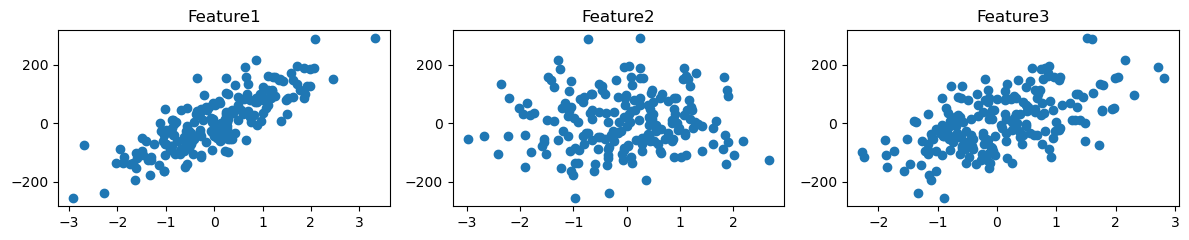

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title("Feature1")
ax2.scatter(df['feature2'], df['target'])
ax2.set_title("Feature2")
ax3.scatter(df['feature3'], df['target'])
ax3.set_title("Feature3")
plt.tight_layout();

# 2. No Multicollinearity

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train,i))

In [25]:
pd.DataFrame({'vif':vif} , index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.007179,1.016725,1.019546


<Axes: >

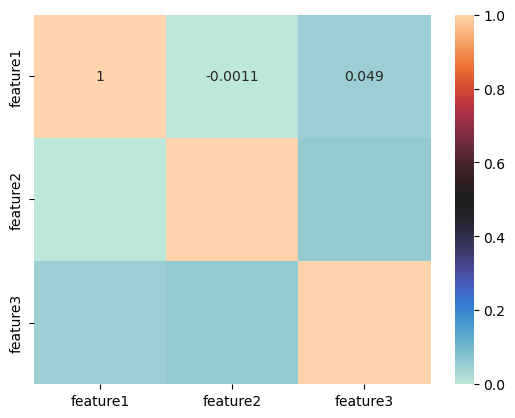

In [26]:
import seaborn as sns
sns.heatmap(df.iloc[:,0:3].corr(),annot=True , cmap='icefire')

# 3. Residual Error(Normality of Residual)

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


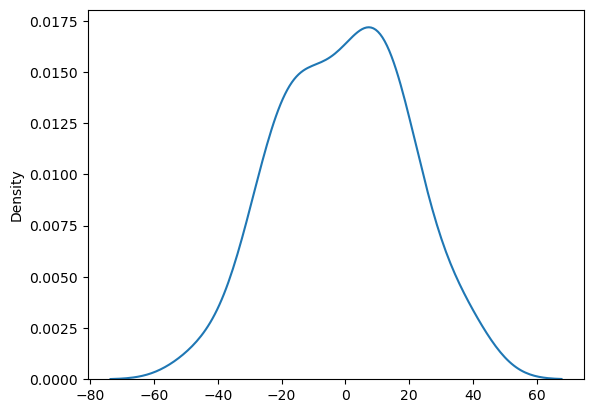

In [32]:
sns.kdeplot(residual);
pd.option_context('mode.use_inf_as_na', True)

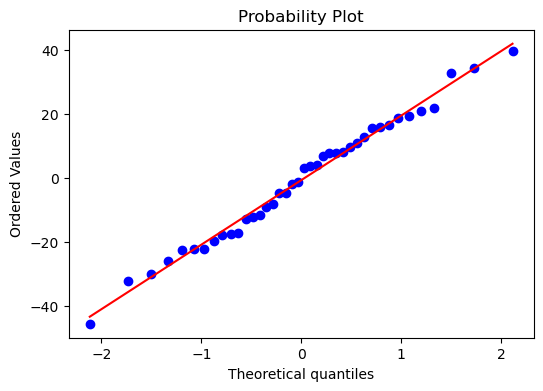

In [39]:
import scipy as sp
#qq-plot

fig , ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True);

# 4. Homoscedasticity

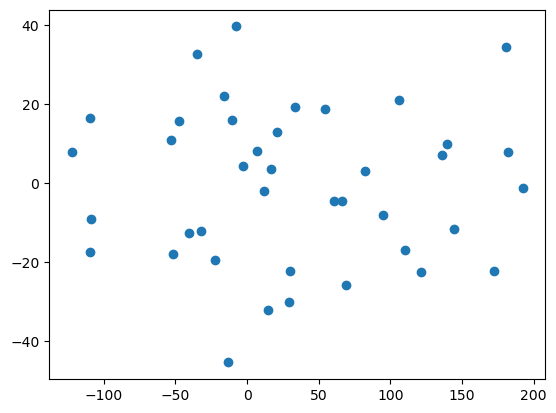

In [41]:
plt.scatter(y_pred,residual);

# 5. Autocorrelation of Residuals 

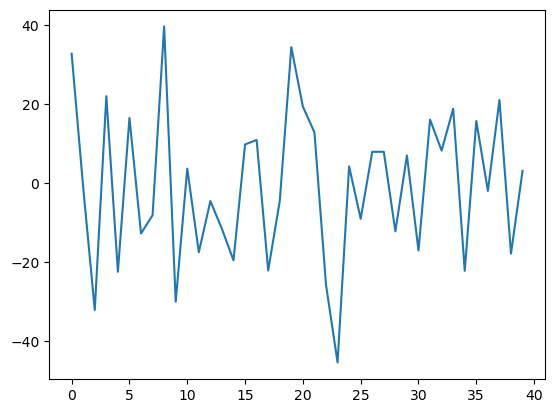

In [42]:
plt.plot(residual);